In [12]:
# Data Exploration and Preprocessing

In [16]:
import pandas as pd

df = pd.read_csv('BlogC.csv')

print(df.head())
print(df.info())
print(df['Labels'].value_counts())


                                                Data       Labels
0  This is a blog post about technology and its a...   Technology
1          The latest trends in health and wellness.       Health
2   Exploring the best travel destinations for 2024.       Travel
3        How to manage personal finance effectively.      Finance
4        Understanding the impact of climate change.  Environment
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    50 non-null     object
 1   Labels  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes
None
Labels
Health         13
Environment    10
Travel          9
Marketing       9
Technology      7
Finance         2
Name: count, dtype: int64


In [13]:
# Task -2 :Naive Bayes Model for Text Classification

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Remove stopwords and lemmatize
    return ' '.join(words)

# Apply the cleaning function to the 'Data' column
df['Data'] = df['Data'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000)


tfidf_matrix = tfidf_vectorizer.fit_transform(df['Data'])


In [15]:
# Task - 3: Sentiment Analysis

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df['Labels'], test_size=0.2, random_state=42
)

# Create the Multinomial Naive Bayes model
nb_classifier = MultinomialNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.50

Classification Report:
               precision    recall  f1-score   support

 Environment       0.00      0.00      0.00         3
     Finance       0.00      0.00      0.00         1
      Health       0.38      1.00      0.55         3
   Marketing       1.00      1.00      1.00         1
      Travel       1.00      0.50      0.67         2

    accuracy                           0.50        10
   macro avg       0.47      0.50      0.44        10
weighted avg       0.41      0.50      0.40        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Task - 3


Sentiment Distribution Across Categories:
 Sentiment    Negative  Neutral  Positive
Labels                                  
Environment         1        6         3
Finance             0        0         2
Health              2        5         6
Marketing           0        4         5
Technology          0        6         1
Travel              0        3         6


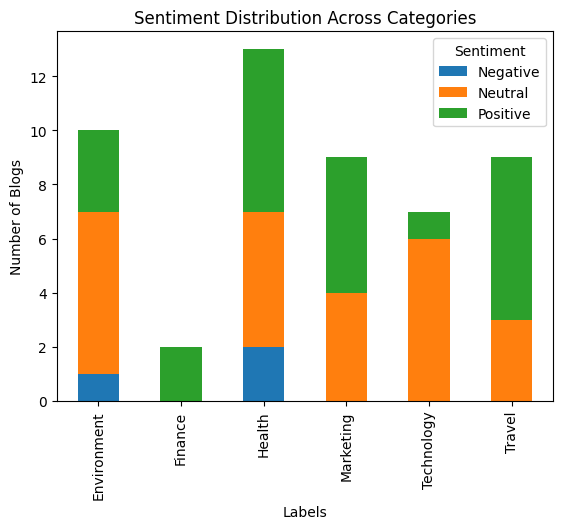

In [20]:
from textblob import TextBlob

# Function for sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)

# Analyze sentiment distribution
sentiment_counts = df.groupby('Labels')['Sentiment'].value_counts().unstack(fill_value=0)

# Print the results
print("\nSentiment Distribution Across Categories:\n", sentiment_counts)

import matplotlib.pyplot as plt
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.ylabel('Number of Blogs')
plt.show()


In [9]:
# Task - 4

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}")



Evaluation Metrics:
Accuracy: 0.50
Precision (Weighted): 0.41
Recall (Weighted): 0.50
F1-Score (Weighted): 0.40


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
